In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Govind155/Web-Phishing-Detection-/main/dataset.csv')
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,NaN,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1.0,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1.0,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1.0,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,NaN,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


# EDA and FE

In [3]:
df.rename(columns = {"having_IPhaving_IP_Address":"having_ip_address"},inplace = True)
df.head()

,index,having_ip_address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,NaN,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1.0,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1.0,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1.0,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,NaN,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


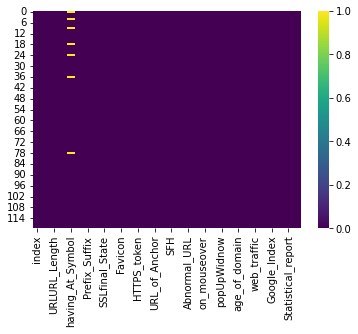

In [4]:
sns.heatmap(df[0:120].isnull(),cmap = 'viridis')
plt.savefig('heatmap.png')

In [5]:
df.describe()

,index,having_ip_address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,10959.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.703440,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.710787,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print(df.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.051330
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_ip_address              0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


In [8]:
df.drop(['Favicon','Iframe','Redirect',
                'popUpWidnow','RightClick','Submitting_to_email'],axis=1,inplace=True)
print(len(df.columns))

26


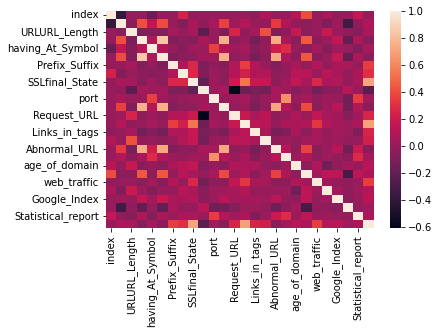

In [9]:
sns.heatmap(df.corr())
plt.savefig('corr.png')

In [10]:
l = [1,-1]
length = len(df)

for i in range(length):
  if(df['having_At_Symbol'].isnull().sum()):
    rand = random.randint(0,1)
    df['having_At_Symbol'][i] = l[rand]
  
df.head()

<ipython-input-10-4b9874e80c0d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['having_At_Symbol'][i] = l[rand]


,index,having_ip_address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1.0,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1.0,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1.0,1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,-1.0,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1.0,1,-1,1,1,-1,...,1,-1,-1,-1,0,-1,1,1,1,1


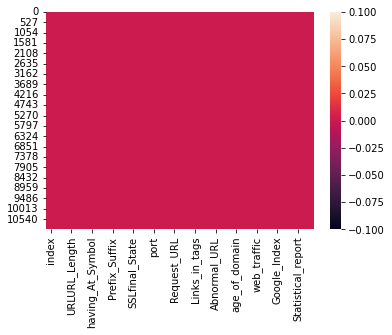

In [11]:
sns.heatmap(df.isnull())
plt.savefig('clean_heatmap.png')

<Axes: xlabel='having_At_Symbol', ylabel='count'>

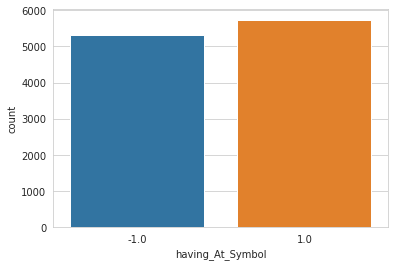

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='having_At_Symbol',data=df)

<Axes: xlabel='having_ip_address', ylabel='count'>

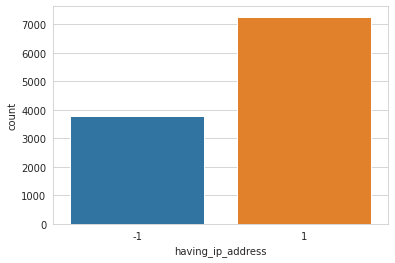

In [13]:
sns.countplot(x='having_ip_address',data=df)

<Axes: xlabel='web_traffic', ylabel='count'>

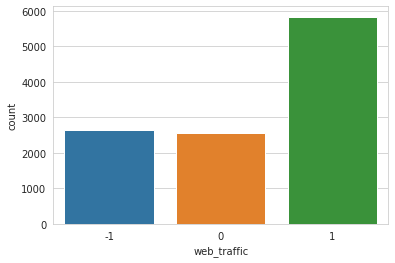

In [14]:
sns.countplot(x='web_traffic', data=df)

<Axes: xlabel='Result', ylabel='count'>

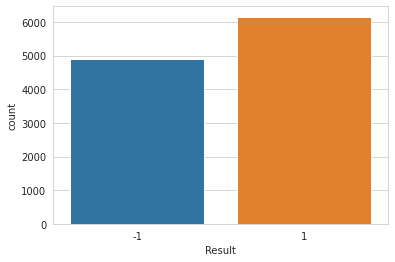

In [15]:
sns.countplot(x='Result', data=df)

<Axes: xlabel='Links_pointing_to_page', ylabel='count'>

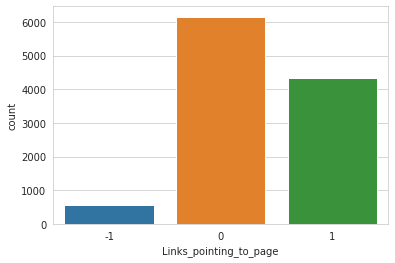

In [16]:
sns.countplot(x='Links_pointing_to_page', data=df)

<Axes: xlabel='Result', ylabel='count'>

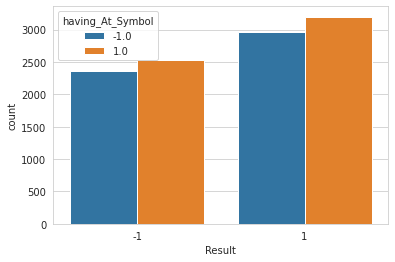

In [17]:
sns.countplot(x='Result', hue='having_At_Symbol', data=df)

<ipython-input-18-dccb5a02d08c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Result'], color='darkblue')


<Axes: xlabel='Result', ylabel='Density'>

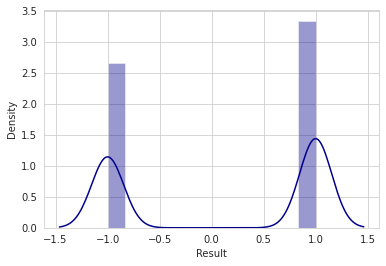

In [18]:
sns.distplot(df['Result'], color='darkblue')

<ipython-input-19-f0e39f76d153>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Links_pointing_to_page'])


<Axes: xlabel='Links_pointing_to_page', ylabel='Density'>

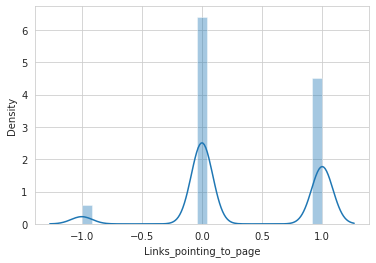

In [19]:
sns.distplot(df['Links_pointing_to_page'])

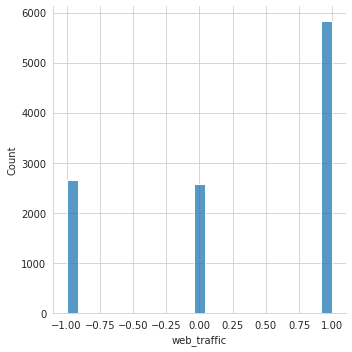

In [20]:
sns.displot(df['web_traffic'])

In [21]:
a=len(df[df.Result==0])
b=len(df[df.Result==-1])
c=len(df[df.Result==1])

In [22]:
print("Count of Legitimate Websites = ", b)
print("Count of Suspicious Websites = ", a)
print("Count of Phishy Websites = ", c)

Count of Legitimate Websites =  4898
Count of Suspicious Websites =  0
Count of Phishy Websites =  6157


In [23]:
df.drop(['index'],axis=1,inplace=True)
print(len(df.columns))

25


array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

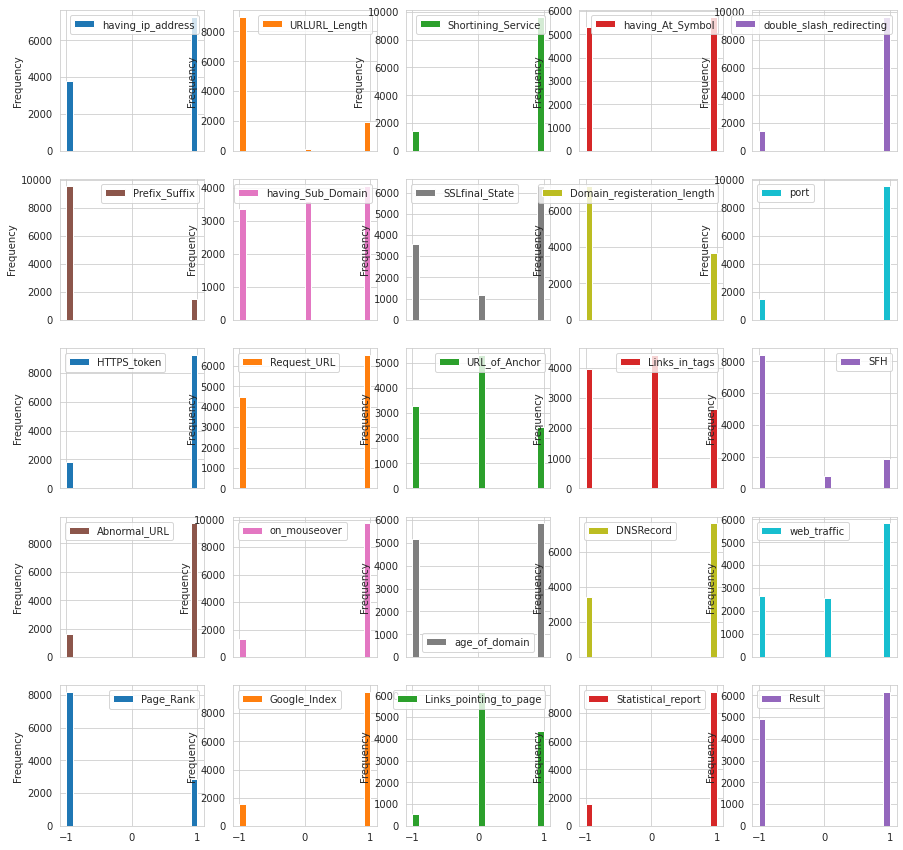

In [24]:
df.plot.hist(subplots=True,layout=(5,5),figsize=(15, 15), bins=20)

In [25]:
df.corr()

,having_ip_address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_ip_address,1.000000,-0.052411,0.403461,-0.007482,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.060979,...,0.336549,0.084059,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,-0.052411,1.000000,-0.097881,0.000391,-0.081247,0.055247,0.003997,0.048754,-0.221892,0.000323,...,-0.106761,-0.045103,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.022223,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.002201,...,0.739290,0.062383,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.007482,0.000391,0.022223,1.000000,0.015423,0.001996,0.035457,-0.012820,0.005586,0.035117,...,0.031857,0.028197,0.016628,0.031959,0.006084,-0.007896,0.011854,-0.005899,0.013231,0.001392
double_slash_redirecting,0.397389,-0.081247,0.842796,0.015423,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.025060,...,0.723724,0.086635,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,0.001996,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.022546,...,-0.077620,0.012578,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,0.035457,-0.043079,0.087891,1.000000,0.267649,-0.082839,0.004863,...,-0.034908,-0.018082,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,-0.012820,-0.036200,0.261391,0.267649,1.000000,-0.193622,0.027473,...,-0.046245,0.023586,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.005586,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.022478,...,0.058109,0.023784,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
port,0.060979,0.000323,0.002201,0.035117,0.025060,-0.022546,0.004863,0.027473,0.022478,1.000000,...,0.054126,0.623298,0.008459,0.054849,-0.028543,0.017954,-0.005413,-0.139104,0.343987,0.036419


~ Hence, now the cleaned data can be further sent ahead for splitting and then for Ml model training and testing.